In [1]:
#The data is in the csv files
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as pl
import matplotlib.dates as mdates
import datetime

In [2]:
tempanomaly = pd.read_csv('C:/Users/OEM/Desktop/DATA201/project/projectdata/annual-average-temperature-anomaly-19092013.csv',parse_dates=True)
oscillation = pd.read_csv('C:/Users/OEM/Desktop/DATA201/project/projectdata/monthly-el-nino-southern-oscillation-index-19862016.csv',parse_dates=True)
rainfall = pd.read_csv('C:/Users/OEM/Desktop/DATA201/project/projectdata/rainfall-19602016.csv',parse_dates=True)

QUESTION 1:

In [3]:
# Create a new dataset that contain only the data for matched years and locations where appropriate
df1 = tempanomaly #1793 rows, 5 columns
df2 = oscillation #372 rows, 2 columns
df3 = rainfall #617808 rows, 3 columns

In [4]:
print("Null values in df1?: ", df1.isnull().values.any()) #must fill since small amount of data
print("Null values in df2?: ", df2.isnull().values.any()) #no need to clean nans.
print("Null values in df3?: ", df3.isnull().values.any()) #must fill since large amount of nulls.

Null values in df1?:  True
Null values in df2?:  False
Null values in df3?:  True


In [5]:
#Dataset for Auckland Question 5.
dfauckland1 = df1.copy()
dfauckland2 = df2.copy()
dfauckland3 = df3.copy()

In [6]:
df1 = pd.DataFrame(df1)

#Convert index to datetime for resampling and grouping
df1.index = pd.to_datetime(df1.index, unit='s')
df1.dropna(subset = ["value"], inplace=True)
df1 = df1[df1.data == 'Temp']
df1 = df1[df1.station != '7_Stn_Composite']
df1 = df1[df1.Year >= '1986']
df1 = df1[df1.Year <= '2013']

#-----------------------
#Temperature cities
#Helpful for question 2. and question 4.
df10 = df1[df1.station == 'Auckland']
df11 = df1[df1.station == 'Masterton']
df12 = df1[df1.station == 'Wellington']
df13 = df1[df1.station == 'Hokitika']
df14 = df1[df1.station == 'Nelson']
df15 = df1[df1.station == 'Dunedin']
frames1 = [df10, df11, df12,df13,df14,df15]
result1 = pd.concat(frames1)
#-----------------------

#groupby 1986-2013
df1 = df1.groupby('Year').resample('Y').mean()
df1.reset_index(inplace=True)
df1final = df1.drop(columns=['level_1'])
df1final

,Year,value
0,1986,12.654286
1,1987,12.770000
2,1988,12.928571
3,1989,12.965714
4,1990,12.984286
5,1991,12.168571
6,1992,11.478571
7,1993,11.837143
8,1994,12.331429
9,1995,12.585714


In [7]:
df2 = pd.DataFrame(df2)

#copy of ENSO for Question 6
df2QuestionSix = df2.copy()

df2.Month_year  = df2.Month_year.astype(str)
df2.Month_year = [datetime.datetime.strptime(x,'%b-%y').strftime('%m-%Y') for x in df2.Month_year]
df2.Month_year = df2.Month_year.str[3:]

df2.index = pd.to_datetime(df2.index, unit='s')
df2 = df2[df2.Month_year >= '1986']
df2 = df2[df2.Month_year <= '2013']


#groupby before hand 1986-2013
df2 = df2.groupby('Month_year').resample('Y').mean()

df2.reset_index(inplace=True)
df2final = df2.drop(columns=['level_1'])
df2final

,Month_year,Southern_oscillation_index
0,1986,-0.083333
1,1987,-0.933333
2,1988,0.816667
3,1989,0.708333
4,1990,-0.116667
5,1991,-0.575000
6,1992,-0.825000
7,1993,-0.650000
8,1994,-0.825000
9,1995,-0.016667


In [8]:
df3 = pd.DataFrame(df3)

df3['Date'] = pd.DatetimeIndex(df3['Date']).year
df3['Date'] = df3['Date'].astype(str)

df3.index = pd.to_datetime(df3.index)
#Drop nans
df3.dropna(subset = ["Date"], inplace=True)
df3.dropna(subset = ["Rainfall_mm"], inplace=True)

df3 = df3[df3.Date >= '1986']
df3 = df3[df3.Date <= '2014']

#Rainfall cities
#Helpful for question 2. and question 4.----
df30 = df3[df3.site == 'Auckland']
df31 = df3[df3.site == 'Masterton']
df32 = df3[df3.site == 'Wellington']
df33 = df3[df3.site == 'Hokitika']
df34 = df3[df3.site == 'Nelson']
df35 = df3[df3.site == 'Dunedin']
frames2 = [df30, df31, df32, df33, df34,df35]
result2 = pd.concat(frames2)
result2
#-------------------------------------------

#groupby before hand 1986-2013
df3 = df3.groupby('Date').resample('Y').mean()
df3.reset_index(inplace=True)
df3final = df3.drop(columns=['level_1'])
df3final.Date = df3final.Date.str[:4]
df3final

,Date,Rainfall_mm
0,1986,3.516545
1,1987,3.578227
2,1988,3.917772
3,1989,3.615909
4,1990,3.578057
5,1991,3.588853
6,1992,3.451722
7,1993,3.112198
8,1994,3.620906
9,1995,4.263585


QUESTION 2: Plot the graphs against ENSO(by matching year and matching locations)

Text(0.5, 0, 'Years')

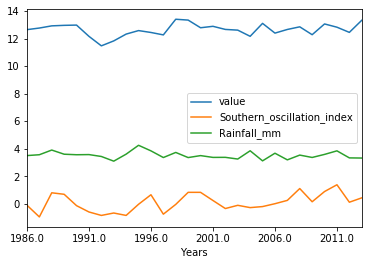

In [9]:
#PLOTTING by matching year
ax = df1.plot(x='Year',y='value')
ax2 = df2.plot(ax=ax, x='Month_year', y='Southern_oscillation_index')
df3.plot(ax=ax2, x='Date',y='Rainfall_mm')
pl.xlabel('Years')

Text(0.5, 0, 'Years')

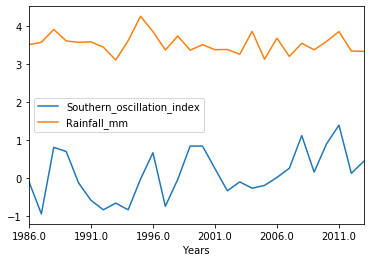

In [10]:
#PLOTTING by matching Years..
ax = df2.plot(x='Month_year',y='Southern_oscillation_index')
ax2 = df3.plot(ax=ax, x='Date', y='Rainfall_mm')
pl.xlabel('Years')

There Seems To be a temporal pattern detected revolving around Oscillation and rainfall.

With yearly/monthly resample averaging we can see that there is spikes every 2-7 years. Average 4. With Oscillation index being lower on average but having a similar pattern to Rainfall.

QUESTION 3: Test whether or not there is a correlation between the rainfall and temperature and the index

In [11]:
#Correlation between rainfall and temperature and index 
firstmerge = df1final.merge(df2final, left_on='Year', right_on='Month_year')
secondmerge = firstmerge.merge(df3final, left_on='Year', right_on='Date')
secondmerge
secondmerge.corr()

,value,Southern_oscillation_index,Rainfall_mm
value,1.000000,0.565364,0.051415
Southern_oscillation_index,0.565364,1.000000,0.236053
Rainfall_mm,0.051415,0.236053,1.000000


As shown there is a correlation between all three. ENSO and Temperature and Rainfall

In [12]:
#Correlation between Temp and rainfall
temprainfall = df1final.merge(df3final, left_on='Year', right_on='Date')
temprainfall.corr()

,value,Rainfall_mm
value,1.000000,0.051415
Rainfall_mm,0.051415,1.000000


There is a small correlation between Temp and rainfall

In [13]:
#Correlation between Rainfall and ENSO
ENSOrainfall = df2final.merge(df3final, left_on='Month_year', right_on='Date')
ENSOrainfall.corr()

,Southern_oscillation_index,Rainfall_mm
Southern_oscillation_index,1.000000,0.236053
Rainfall_mm,0.236053,1.000000


There is a weak positive correlation between Rainfall and ENSO

In [14]:
#Correlation between ENSO and TEMP
tempENSO = df1final.merge(df2final, left_on='Year', right_on='Month_year')
tempENSO.corr()

,value,Southern_oscillation_index
value,1.000000,0.565364
Southern_oscillation_index,0.565364,1.000000


There is a medium positive correlation between ENSO and Temp

QUESTION 4: Test whether or not this correlation is stronger or weaker in different parts of the country

In [15]:
#Compare rainfall and temperature dataset correlations..
#Auckland, Masterton, Wellington,Hokitika, Dunedin, Nelson

In [16]:
#Combine Auckland(temperature and rainfall) and index.
a = df10.merge(df30, left_on='station', right_on='site')
a = a.merge(df2final, left_on='Year', right_on='Month_year')
a
a.corr()

,value,Rainfall_mm,Southern_oscillation_index
value,1.000000e+00,4.953770e-17,5.868447e-01
Rainfall_mm,4.953770e-17,1.000000e+00,-1.681538e-17
Southern_oscillation_index,5.868447e-01,-1.681538e-17,1.000000e+00


In [17]:
#Combine Masterton(temperature and rainfall) and index.
m = df11.merge(df31, left_on='station', right_on='site')
m2 = m.merge(df2final, left_on='Year', right_on='Month_year')
m2
m.corr()

,value,Rainfall_mm
value,1.000000e+00,2.605786e-17
Rainfall_mm,2.605786e-17,1.000000e+00


In [18]:
#Combine Wellington(temperature and rainfall) and index.
w = df12.merge(df32, left_on='station', right_on='site')
w2 = w.merge(df2final, left_on='Year', right_on='Month_year')
w2
w2.corr()

,value,Rainfall_mm,Southern_oscillation_index
value,1.000000e+00,-2.559109e-17,4.481349e-01
Rainfall_mm,-2.559109e-17,1.000000e+00,-4.926655e-17
Southern_oscillation_index,4.481349e-01,-4.926655e-17,1.000000e+00


In [19]:
#Combine Hokitika(temperature and rainfall) and index.
h = df13.merge(df33, left_on='station', right_on='site')
h2 = h.merge(df2final, left_on='Year', right_on='Month_year')
h2
h2.corr()

,value,Rainfall_mm,Southern_oscillation_index
value,1.000000e+00,3.001463e-17,6.064387e-01
Rainfall_mm,3.001463e-17,1.000000e+00,6.387301e-17
Southern_oscillation_index,6.064387e-01,6.387301e-17,1.000000e+00


In [20]:
#Combine Dunedin(temperature and rainfall) and index.
d = df14.merge(df34, left_on='station', right_on='site')
d2 = d.merge(df2final, left_on='Year', right_on='Month_year')
d2
d2.corr()

,value,Rainfall_mm,Southern_oscillation_index
value,1.000000e+00,-2.590673e-17,5.705803e-01
Rainfall_mm,-2.590673e-17,1.000000e+00,1.204705e-16
Southern_oscillation_index,5.705803e-01,1.204705e-16,1.000000e+00


In [21]:
#Combine Nelson(temperature and rainfall) and index.
n = df15.merge(df35, left_on='station', right_on='site')
n2 = n.merge(df2final, left_on='Year', right_on='Month_year')
n2
n2.corr()

,value,Rainfall_mm,Southern_oscillation_index
value,1.000000e+00,7.109773e-17,4.818750e-01
Rainfall_mm,7.109773e-17,1.000000e+00,-1.092882e-16
Southern_oscillation_index,4.818750e-01,-1.092882e-16,1.000000e+00


There is definitely some correlations detected.

Hokitika has a pretty decent positive correlation of around 0.6.

Nelson = 0.48

Dunedin = 0.57

Wellington = 0.44

Masterton = 2.6x10^-17

Auckland = 0.58.

All correlations are relatively similar, although Masterton has the most weakest correlation. 

QUESTION 5: Using Auckland data, predict the strength of the ENSO index for each year using the
rainfall and temperature data, 
Choose the appropriate data and normalise it
• Split it into training and testing sets
• Choose an appropriate algorithm
• Perform the training
• Report appropriate metrics

In [22]:
#training label

#drop unnecesary columns
df2 = df2.drop(columns=['level_1'])
df2 = df2.drop(columns=['Month_year'])

#transform data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
l = labelencoder.fit_transform(df2.values.ravel())

target = l

df30.Date = df30.Date.str[:4]

#Auckland Data(combined with Rainfall and temperature) 
auckland = df10.merge(df30, left_on='Year', right_on='Date')

#convert to datetime
auckland.index = pd.to_datetime(auckland.index)

#drop all useless columns
auckland = auckland.drop(columns=['series','station','data','Date','site'])

#resample to resemble shape of target, and reduce the 10K data auckland rows to 28.
#This wull help fit against the ENSO country index.
auckland = auckland.groupby('Year').resample('Y').mean()

#turn into array 
auckland = auckland.to_numpy()
#turn it back into dataframe
auckland = pd.DataFrame(auckland)
auckland.shape

(28, 2)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#x is training data
x = auckland
#y is target
y = target

In [24]:
#Choose the appropriate data and normalise it (i chose standard Scaler)
scaler = StandardScaler()
scaler.fit(auckland)
scaler.transform(auckland)

array([[-3.72412283e-01,  2.39008031e-01],
       [-1.92627043e-01, -1.18573387e+00],
       [ 7.51245468e-01,  3.28943893e-01],
       [-5.77881129e-02,  7.85348186e-02],
       [ 6.16406538e-01,  6.30071130e-01],
       [-1.15897271e+00,  4.69597917e-01],
       [-2.21521100e+00,  1.00656856e+00],
       [-1.87811367e+00, -1.99990845e+00],
       [-8.21875384e-01, -2.84939899e-01],
       [ 4.81567608e-01,  2.30275137e+00],
       [-2.15100198e-01,  1.32159194e+00],
       [-1.06908009e+00, -8.69124557e-01],
       [ 2.30189316e+00,  1.87685517e-01],
       [ 1.13328910e+00, -4.78784311e-01],
       [ 5.26513918e-01, -4.63300262e-01],
       [ 5.71460228e-01,  1.07534815e+00],
       [-2.15100198e-01, -3.81922102e-01],
       [-1.25207578e-01,  1.93468336e-01],
       [-1.33875795e+00,  8.20582213e-01],
       [ 1.22318172e+00, -9.81889517e-01],
       [-5.29724368e-01, -9.78935294e-04],
       [ 2.56836057e-01, -1.54860573e+00],
       [ 4.14148143e-01,  1.04751052e-01],
       [-8.

In [25]:
#• Split it into training and testing sets - 25% split
#set is small due to resampling and aggregation.
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state = 42)
print(len(X_train), ' Training Set +', len(X_test), ' Testing Set')

21  Training Set + 7  Testing Set


In [26]:
#• Choose an appropriate algorithm - logistic regression
l = LogisticRegression(solver = 'lbfgs', multi_class= 'auto')

#Fit model
clf = l.fit(X_train, y_train)

testscore = clf.score(X_test, y_test)
trainscore = clf.score(X_train, y_train)
print('----Values from Logistic Regression train and test Set----')
print('test accuracy: ', testscore)
print('train accuracy: ', trainscore)

#Report appropriate metrics
#root mean squared error metrics is appropriate.
#--------------Reporting RMSE Values-------------------
#on the testing data
y_testpred = clf.predict(X_test)
print('Test data: ', y_testpred)
#on the training data
y_trainpred = clf.predict(X_train)
print('Training data: ', y_trainpred)
#Report the MSE values on the test data
print(' Mean Squared Error for test data: %.4g' % metrics.mean_squared_error(y_test,y_testpred) )
#Report the RMSE values on the test data
print('Root Mean Squared Error for test data: %.4g' % np.sqrt(metrics.mean_squared_error(y_test,y_testpred)) )
#Report the MSE values on the training data
print(' Mean Squared Error for training data: %.4g' % metrics.mean_squared_error(y_train,y_trainpred) )
#Report the MSE values on the training data
print('Root Mean Squared Error for training data: %.4g' % np.sqrt(metrics.mean_squared_error(y_train,y_trainpred)) )

----Values from Logistic Regression train and test Set----
test accuracy:  0.0
train accuracy:  0.2857142857142857
Test data:  [19 16  3 24  1 18 19]
Training data:  [18  3  7 16  3 16  1 18 15  3 19 15  7  1 18  1  3 19  7  7  1]
 Mean Squared Error for test data: 61.71
Root Mean Squared Error for test data: 7.856
 Mean Squared Error for training data: 63.14
Root Mean Squared Error for training data: 7.946


In [27]:
#Algorithm 2 chosen for testing purposes.
from sklearn.linear_model import LinearRegression

#Algorithm 2
l = LinearRegression()
#Fit model

clf = l.fit(X_train, y_train)

testscore = clf.score(X_test, y_test)
trainscore = clf.score(X_train, y_train)
print('----Values from LinearRegression train and test Set----')
print('test accuracy: ', testscore)
print('train accuracy: ', trainscore)

#Report appropriate metrics
#root mean squared error metrics is appropriate.
#--------------Reporting RMSE Values-------------------
#on the testing data
y_testpred = clf.predict(X_test)
print('Test data: ', y_testpred)
#on the training data
y_trainpred = clf.predict(X_train)
print('Training data: ', y_trainpred)
#Report the MSE values on the test data
print(' Mean Squared Error for test data: %.4g' % metrics.mean_squared_error(y_test,y_testpred) )
#Report the RMSE values on the test data
print('Root Mean Squared Error for test data: %.4g' % np.sqrt(metrics.mean_squared_error(y_test,y_testpred)) )
#Report the MSE values on the training data
print(' Mean Squared Error for training data: %.4g' % metrics.mean_squared_error(y_train,y_trainpred) )
#Report the MSE values on the training data
print('Root Mean Squared Error for training data: %.4g' % np.sqrt(metrics.mean_squared_error(y_train,y_trainpred)) )

----Values from LinearRegression train and test Set----
test accuracy:  -0.15987861455918728
train accuracy:  0.4435663852917665
Test data:  [19.11917844 19.99038002  8.68015982 12.82897879 11.79407375 26.14321619
 13.06666879]
Training data:  [15.85727323  6.57716076 18.96456966 17.98522709 10.88449512 17.64034932
  7.85790642 17.97015779 11.82331474  7.15182199 13.27855767 11.87950724
 17.57432919  7.35154389 20.40825529 10.62955982  0.72462924 14.06970223
 15.71394487 18.7857346   2.87195983]
 Mean Squared Error for test data: 58.89
Root Mean Squared Error for test data: 7.674
 Mean Squared Error for training data: 37.64
Root Mean Squared Error for training data: 6.135


Logistic regression has a poorer score than linear. Although linear is not valid since a Negative accuracy score was displayed. Linear regression gives a negative accuracy score which makes sense

QUESTION 6: Using just the ENSO index data, see if you can predict the strength of the ENSO index

In [28]:
#ENSO data(Not Aggregated)
df2QuestionSix 

,Month_year,Southern_oscillation_index
0,Jan-86,1.0
1,Feb-86,-1.0
2,Mar-86,0.5
3,Apr-86,0.3
4,May-86,-0.2
...,...,...
367,Aug-16,0.7
368,Sep-16,1.2
369,Oct-16,-0.3
370,Nov-16,-0.1


In [29]:
#Create Model containing 3 columns
predENSO = pd.DataFrame({'col1': df2QuestionSix.Southern_oscillation_index,
                         'col2': df2QuestionSix.Southern_oscillation_index,
                         'col3': df2QuestionSix.Southern_oscillation_index})
predENSO.col2 = predENSO.col2.shift(-1)
predENSO.col3 = predENSO.col2.shift(-1)

#remove nan rows
predENSO = predENSO.drop([370,371],axis=0)
predENSO = predENSO.drop(['col2','col3'],axis=1)
predENSO

,col1
0,1.0
1,-1.0
2,0.5
3,0.3
4,-0.2
...,...
365,0.6
366,0.4
367,0.7
368,1.2


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [31]:
#FIRST MODEL So My take is using the first three rows 0-2 to predict 4th row.
#This uses logistic Regression.

#label encode to reshape all models to fit - goes first
labelencoder = LabelEncoder()
#predENSO =  predENSO.drop(5,axis=0)
l = labelencoder.fit_transform(predENSO.values.ravel())
target = l
target = np.delete(target, (6), axis=0)

#x(without y)
x = predENSO.drop(4,axis=0)

#target y = row 3
y = target
#• Split it into training and testing sets - 25% split
#set is small due to resampling and aggregation.
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state = 42)
print(len(X_train), ' Training Set +', len(X_test), ' Testing Set')

#Choose the appropriate data and normalise it (i chose standard Scaler)
s = StandardScaler()
s.fit(x)
s.transform(x)
#• Choose an appropriate algorithm - logistic regression
logistic1 = LogisticRegression(solver = 'lbfgs', multi_class= 'auto')

#Fit model
clf = logistic1.fit(X_train, y_train)

testscore = clf.score(X_test, y_test)
trainscore = clf.score(X_train, y_train)
print('----Values from Logistic Regression train and test Set on first model----')
print('test accuracy: ', testscore)
print('train accuracy: ', trainscore)

#Report appropriate metrics
#root mean squared error metrics is appropriate.
#--------------Reporting RMSE Values-------------------
#on the testing data
y_testpred = clf.predict(X_test)
#on the training data
y_trainpred = clf.predict(X_train)

#Report the MSE values on the test data
print(' Mean Squared Error for test data: %.4g' % metrics.mean_squared_error(y_test,y_testpred) )
#Report the RMSE values on the test data
print('Root Mean Squared Error for test data: %.4g' % np.sqrt(metrics.mean_squared_error(y_test,y_testpred)) )
#Report the MSE values on the training data
print(' Mean Squared Error for training data: %.4g' % metrics.mean_squared_error(y_train,y_trainpred) )
#Report the MSE values on the training data
print('Root Mean Squared Error for training data: %.4g' % np.sqrt(metrics.mean_squared_error(y_train,y_trainpred)) )

295  Training Set + 74  Testing Set
----Values from Logistic Regression train and test Set on first model----
test accuracy:  0.20270270270270271
train accuracy:  0.2271186440677966
 Mean Squared Error for test data: 7.865
Root Mean Squared Error for test data: 2.804
 Mean Squared Error for training data: 9.234
Root Mean Squared Error for training data: 3.039


In [32]:
#SECOND MODEL(a)-logistic regression
#Using the first six rows 0-5 to predict row 7th.

#label encode to reshape all models to fit - goes first
labelencoder = LabelEncoder()
#predENSO =  predENSO.drop(5,axis=0)
l = labelencoder.fit_transform(predENSO.values.ravel())
target = l
target = np.delete(target, (8), axis=0)

#x(without y)
x = predENSO.drop(6,axis=0)

#target y = row 3
y = target
#• Split it into training and testing sets - 25% split
#set is small due to resampling and aggregation.
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state = 42)
print(len(X_train), ' Training Set +', len(X_test), ' Testing Set')

#Choose the appropriate data and normalise it (i chose standard Scaler)
s = StandardScaler()
s.fit(x)
s.transform(x)
#• Choose an appropriate algorithm - logistic regression
logistic1 = LogisticRegression(solver = 'lbfgs', multi_class= 'auto')

#Fit model
clf = logistic1.fit(X_train, y_train)

testscore = clf.score(X_test, y_test)
trainscore = clf.score(X_train, y_train)
print('----Values from Logistic Regression train and test Set on second model----')
print('test accuracy: ', testscore)
print('train accuracy: ', trainscore)

#Report appropriate metrics
#root mean squared error metrics is appropriate.
#--------------Reporting RMSE Values-------------------
#on the testing data
y_testpred = clf.predict(X_test)
#on the training data
y_trainpred = clf.predict(X_train)

#Report the MSE values on the test data
print(' Mean Squared Error for test data: %.4g' % metrics.mean_squared_error(y_test,y_testpred) )
#Report the RMSE values on the test data
print('Root Mean Squared Error for test data: %.4g' % np.sqrt(metrics.mean_squared_error(y_test,y_testpred)) )
#Report the MSE values on the training data
print(' Mean Squared Error for training data: %.4g' % metrics.mean_squared_error(y_train,y_trainpred) )
#Report the MSE values on the training data
print('Root Mean Squared Error for training data: %.4g' % np.sqrt(metrics.mean_squared_error(y_train,y_trainpred)) )

295  Training Set + 74  Testing Set
----Values from Logistic Regression train and test Set on first model----
test accuracy:  0.14864864864864866
train accuracy:  0.17288135593220338
 Mean Squared Error for test data: 8.122
Root Mean Squared Error for test data: 2.85
 Mean Squared Error for training data: 9.753
Root Mean Squared Error for training data: 3.123


In [33]:
#THIRD MODEL(b)-logistic regression
#Using the first twelve rows 0-11 to predict row 13th.

#label encode to reshape all models to fit - goes first
labelencoder = LabelEncoder()
#predENSO =  predENSO.drop(5,axis=0)
l = labelencoder.fit_transform(predENSO.values.ravel())
target = l
target = np.delete(target, (14), axis=0)

#x(without y)
x = predENSO.drop(12,axis=0)

#target y = row 3
y = target
#• Split it into training and testing sets - 25% split
#set is small due to resampling and aggregation.
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state = 42)
print(len(X_train), ' Training Set +', len(X_test), ' Testing Set')

#Choose the appropriate data and normalise it (i chose standard Scaler)
s = StandardScaler()
s.fit(x)
s.transform(x)
#• Choose an appropriate algorithm - logistic regression
logistic1 = LogisticRegression(solver = 'lbfgs', multi_class= 'auto')

#Fit model
clf = logistic1.fit(X_train, y_train)

testscore = clf.score(X_test, y_test)
trainscore = clf.score(X_train, y_train)
print('----Values from Logistic Regression train and test Set on Third model----')
print('test accuracy: ', testscore)
print('train accuracy: ', trainscore)

#Report appropriate metrics
#root mean squared error metrics is appropriate.
#--------------Reporting RMSE Values-------------------
#on the testing data
y_testpred = clf.predict(X_test)
#on the training data
y_trainpred = clf.predict(X_train)

#Report the MSE values on the test data
print(' Mean Squared Error for test data: %.4g' % metrics.mean_squared_error(y_test,y_testpred) )
#Report the RMSE values on the test data
print('Root Mean Squared Error for test data: %.4g' % np.sqrt(metrics.mean_squared_error(y_test,y_testpred)) )
#Report the MSE values on the training data
print(' Mean Squared Error for training data: %.4g' % metrics.mean_squared_error(y_train,y_trainpred) )
#Report the MSE values on the training data
print('Root Mean Squared Error for training data: %.4g' % np.sqrt(metrics.mean_squared_error(y_train,y_trainpred)) )

295  Training Set + 74  Testing Set
----Values from Logistic Regression train and test Set on first model----
test accuracy:  0.20270270270270271
train accuracy:  0.2305084745762712
 Mean Squared Error for test data: 7.041
Root Mean Squared Error for test data: 2.653
 Mean Squared Error for training data: 8.776
Root Mean Squared Error for training data: 2.962


Explain why you get the results you do:

The First model consist of the first three rows(0-2) predicting the 4th row.
The Second model consist of the last six rows(0-5) predicting the 7th row.
The Third model consist of the last twelve rows(0-11) predicting the 13th row.

Sidenote: I dropped column two and three for the overall ENSO dataset.
I did this so i can get the right number of samples to transform to fit the samples. Since the values were similar in general i decided it was appropriate. Also label encoding and standardizing it helped.

The mean squared error and root mean squared error in general was very small for all three models. The error could be small as the dataset is less than 1000. Therefore that factor can affect the result being too small.

The accuracy scores were all generally low. Linear regression is not suited for this type of model training. Logistic regression was better suited. If the last n(rows) were greater, we could possibly have gotten higher accuracy scores.

 Question 7: Test whether or not the ENSO is getting stronger or weaker over time.

Discussing about the ENSO is going stronger or weaker does not depend on the line going higher or lower on a timeseries plot. We will have to go through the index of each dataset and figure out what their correlations are.